### Insights from WeRateDogs Data

**WeRateDogs** is one of the more popular Twitter accounts with 7.42 million at the time of writing. This account is devoted to, you guessed it, rating dogs.

In this article, I'll be taking a look at the archived tweets graciously provided by **WeRateDogs** beginning from the account's creation up to around August of 2017. The goal is to illustrate the process of gaining insight into your data after you've gone through the whole wrangling process. In addition to the archived tweet data, I've also been provided with the prediction results of a machine learning algorithm trained on pictures from a sample of the archived tweets which I used to supplement the archived tweet data.

I've already performed the tedious but necessary task of wrangling the data so I'll jump right into sharing some of the insights I've gained from the data which I've grouped into two categories: insights about the tweets themselves and general insights about the **WeRateDogs** account. Before that, I'll import the necessary libraries and let you take a peek at the cleaned data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

# Enable inline plotting, use seaborn styling on plots, and ignore matplotlib and seaborn warnings
%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

# Import cleaned data and display it
twitter_archive_master = pd.read_csv('twitter-archive-master.csv')
twitter_archive_master

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,7454.0,35320.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,5534.0,30563.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,3660.0,23001.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,7627.0,38607.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,8224.0,36888.0
...,...,...,...,...,...,...,...,...,...,...
2075,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,NaN,NaN,39.0,95.0
2076,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,NaN,NaN,124.0,263.0
2077,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,NaN,NaN,39.0,108.0
2078,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,NaN,NaN,41.0,118.0


## Tweet insights

### Most common dog breeds
One of the first things I was interested in knowing is: what are the most common dog breeds that appear in the tweets made by **WeRateDogs**? Since the cleaned dataset already contains the correct predictions made by the algorithm, I've been spared having to trawl through the over 2000 pictures and identify the breed of each dog. I should mention that not every tweet in the dataset has a corresponding dog breed. This is to be expected given the nature of machine learning algorithms and the process of training them. This isn't something that I need to be too concerned about as the total amount of correct predictions made by the algorithm is sufficient for the insight gained here to be meaningful.

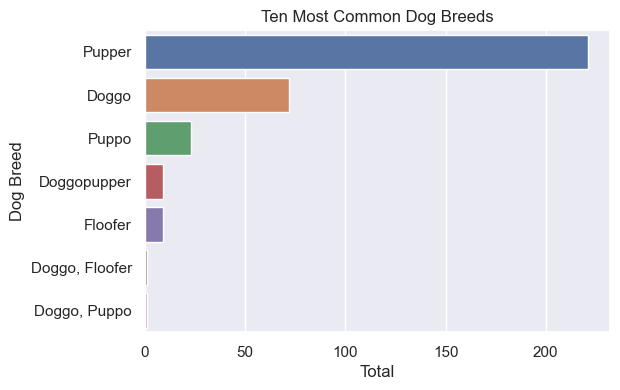

In [2]:
top_breeds = (twitter_archive_master['dog breed'].value_counts()
              .head(10)
              .to_frame()
              .reset_index()
              .rename(columns={'index': 'dog breed', 'dog breed': 'total'}))
top_breeds['dog breed'] = top_breeds['dog breed'].str.title()
plt.figure(dpi=100);
ax = sns.barplot(x='total', y='dog breed', data=top_breeds);
ax.set_title('Ten Most Common Dog Breeds');
ax.set_ylabel('Dog Breed');
ax.set_xlabel('Total');

Here I can see that the dog breed that appears most often in **WeRateDogs** tweets even compared to the rest of the most common dog breeds is the Golden Retriever. In fact, it seems that the Golden Retriever is far and away the most common dog breed. Given the **WeRateDogs** account's huge following, this could be an indication of the overall popularity of not only the breeds shown in the chart but the other breeds in the sample as well. This is, of course, assuming that the people who follow **WeRateDogs** is representative of dog owners as a whole.

### Most common scores
Another unique aspect of **WeRateDogs** and one of the biggest draws is the scoring system where the numerator is usually larger than the denominator. Here I'll see which scores are most commonly handed out.

In [3]:
twitter_archive_master['score'] = twitter_archive_master['rating_numerator'].astype(str).str.replace('\.0$', '', regex=True) + \
                                  '/' + twitter_archive_master['rating_denominator'].astype(str)
twitter_archive_master.score.value_counts()

12/10       486
10/10       436
11/10       413
13/10       287
9/10        152
8/10         98
7/10         51
14/10        38
5/10         33
6/10         32
3/10         19
4/10         15
2/10          9
1/10          4
1776/10       1
11.26/10      1
9.75/10       1
11.27/10      1
13.5/10       1
420/10        1
0/10          1
Name: score, dtype: int64

By far, the most common scores are 12/10, 11/10, 10/10. The more ridiculous scores with the comically large numerators and denominators are generally quite rare. The presence of scores where the numerator is smaller than the usual denominator of 10 is surprising considering how lenient the WeRateDogs account seems to be with regards to scoring. It's likely that the pictures with these scores are ones where there are no dogs, things other than dogs, or dogs that are not "good dogs" in some way or another.

## WeRateDogs account insights

### Total tweets per month

One of the really nice things about the archived tweets is that they come with timestamps. With imestamps, you have access to a new dimension of analysis as you're able to view trends over periods of time. I'll use the provided timestamps to gain some insight into how often **WeRateDogs** posts tweets. Keep in mind that the account was started in November 15, 2015.

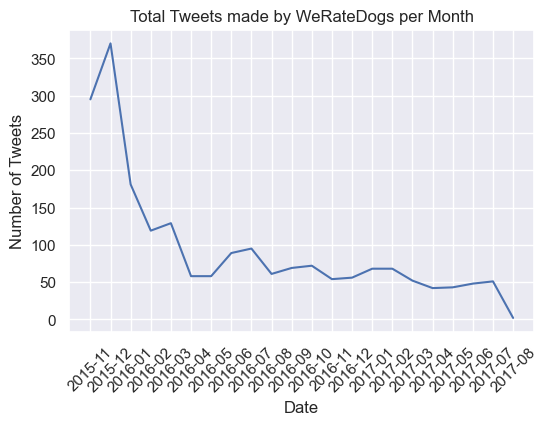

In [4]:
# Prepare tweet_archive for plotting
twitter_archive_master['timestamp'] = pd.to_datetime(twitter_archive_master['timestamp'])
twitter_archive_master['year_month_date'] = twitter_archive_master['timestamp'].dt.year.astype(str) + '-' + \
                                            twitter_archive_master['timestamp'].dt.month.astype(str).str.pad(2, fillchar='0')
twitter_archive_master['is_tweet'] = np.where(twitter_archive_master.tweet_id.notnull(), 1, 0)

# Get required data from twitter_archive
twitter_archive_monthly_tweets = twitter_archive_master.groupby('year_month_date').is_tweet.sum().reset_index()

# Plot the data
plt.figure(dpi=100);
plt.xticks(rotation=45);
ax = sns.lineplot(x='year_month_date', y='is_tweet', data=twitter_archive_monthly_tweets);
ax.set_title('Total Tweets made by WeRateDogs per Month');
ax.set_xlabel('Date');
ax.set_ylabel('Number of Tweets');

From the plot, I can see that the total tweets per month peaked in December of 2015 and gradually decreased throughout 2016 and the majority of 2017. Although there were periods where the number of tweets have increased, there is a general downward trend. This seems to indicate that, when the account was first started, the people behind the account had more time to tweet, time that diminished over the almost two years that the account has been active at the time this data was collected. A more recent archive of **WeRateDog** tweets which includes dates up to the current day may show a new trend.

I've described just a handful of insights that can be gained from the **WeRateDogs** tweet archive. There are still many more insights waiting to be found. I hope that this article has shown you that, while there's a lot that goes into extracting meaningful information from data, this information is still within your reach. All you have to do is find yourself some data and start digging in with your favorite tools.